# Data Augmentation for Other Modalities

This notebook explores data augmentation techniques for various data modalities beyond images, including text, time series, tabular data, speech, and document images. Each data type requires specialized augmentation strategies to effectively increase training data diversity while maintaining the essential characteristics of the data.

## Text Data Augmentation with nlpaug

Text augmentation is crucial for improving NLP models by creating variations that preserve meaning while introducing linguistic diversity. The `nlpaug` library provides various techniques for text augmentation, including character-level, word-level, and sentence-level transformations.

In [2]:
# Install nlpaug library
!pip install -q nlpaug

# Download necessary NLTK data
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc
from nlpaug.util import Action

# Sample text for augmentation
text = "The quick brown fox jumps over the lazy dog."
print(f"Original text: {text}\n")

# Character-level augmentation
aug_char_swap = nac.RandomCharAug(action="swap")
augmented_text = aug_char_swap.augment(text)
print(f"Character swap: {augmented_text}")

aug_char_insert = nac.RandomCharAug(action="insert")
augmented_text = aug_char_insert.augment(text)
print(f"Character insertion: {augmented_text}")

# Word-level augmentation (simple, no external resources)
aug_word_swap = naw.RandomWordAug(action="swap")
augmented_text = aug_word_swap.augment(text)
print(f"Word swap: {augmented_text}")

aug_word_delete = naw.RandomWordAug(action="delete")
augmented_text = aug_word_delete.augment(text)
print(f"Word deletion: {augmented_text}")

# Back translation (requires internet, might not work in all environments)
try:
    aug_back_translation = naw.BackTranslationAug(
        from_model_name='facebook/wmt19-en-de',
        to_model_name='facebook/wmt19-de-en'
    )
    augmented_text = aug_back_translation.augment(text)
    print(f"Back translation: {augmented_text}")
except Exception as e:
    print(f"Back translation failed: {e}")

# Simple text augmentation without external dependencies
def simple_text_augmentation(text):
    import random

    # Split text into words
    words = text.split()

    # Random word swap
    if len(words) > 1:
        i, j = random.sample(range(len(words)), 2)
        words[i], words[j] = words[j], words[i]

    # Rejoin text
    return ' '.join(words)

print(f"\nSimple word swap: {simple_text_augmentation(text)}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Original text: The quick brown fox jumps over the lazy dog.

Character swap: ['The uqcik brwno fox jumps eovr the lazy dog.']
Character insertion: ['The 1quBick brown fox jumps Uozver the wlNazy dog.']
Word swap: ['Brown the quick fox jumps over the lazy. dog']
Word deletion: ['The brown fox jumps over dog.']


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

Some weights of FSMTForConditionalGeneration were not initialized from the model checkpoint at facebook/wmt19-en-de and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

Some weights of FSMTForConditionalGeneration were not initialized from the model checkpoint at facebook/wmt19-de-en and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/260 [00:00<?, ?B/s]

Back translation failed: Cannot copy out of meta tensor; no data! Please use torch.nn.Module.to_empty() instead of torch.nn.Module.to() when moving module from meta to a different device.

Simple word swap: the quick brown fox jumps over The lazy dog.


## Time Series Data Augmentation

Time series data requires specialized augmentation techniques that preserve temporal patterns while introducing variations. Common techniques include time warping, magnitude warping, jittering, and slicing. We'll create synthetic time series data and apply these augmentations.

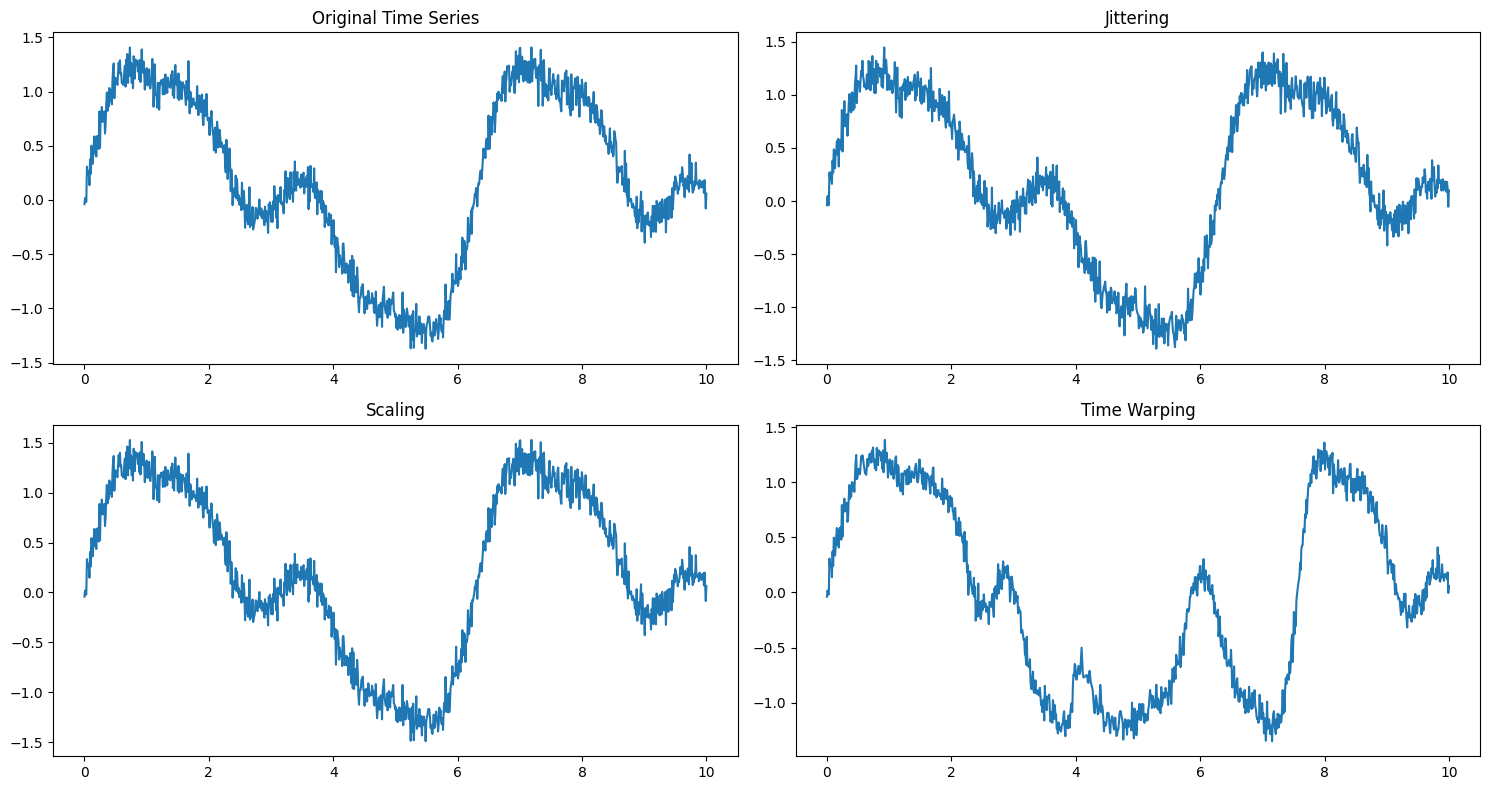

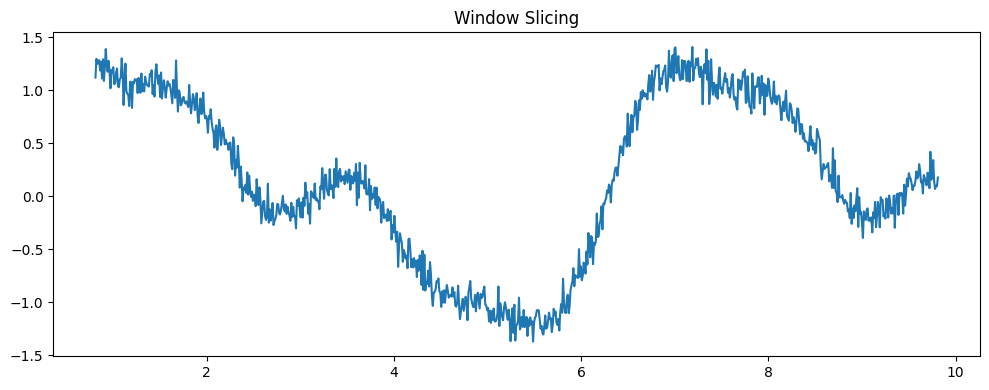

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# Create a synthetic time series dataset
def generate_time_series(n_samples=1000, noise_level=0.1):
    t = np.linspace(0, 10, n_samples)
    # Combine sine waves of different frequencies
    y = np.sin(t) + 0.5 * np.sin(2 * t) + 0.2 * np.sin(4 * t)
    # Add noise
    y += np.random.normal(0, noise_level, n_samples)
    return t, y

# Time series augmentation techniques
def jitter(y, sigma=0.03):
    """Add random noise to the time series values"""
    return y + np.random.normal(0, sigma, len(y))

def scaling(y, sigma=0.1):
    """Multiply time series by a random scaling factor"""
    factor = np.random.normal(1.0, sigma)
    return y * factor

def time_warping(t, y, sigma=0.2, knot=4):
    """Apply random warping to the time axis"""
    # Create warping function
    time_steps = np.arange(len(t))
    knot_positions = np.linspace(0, len(time_steps)-1, knot+2)

    # Create random warping coefficients
    warp_coeffs = np.random.normal(loc=1.0, scale=sigma, size=knot+2)
    warp_coeffs[0] = 1.0  # Fix start point
    warp_coeffs[-1] = 1.0  # Fix end point

    # Apply warping
    warped_steps = np.zeros(len(time_steps))
    for i in range(len(time_steps)):
        # Find which knot segment this point belongs to
        segment = np.searchsorted(knot_positions, i) - 1
        segment = max(0, min(segment, len(knot_positions)-2))

        # Linear interpolation between knot points
        alpha = (i - knot_positions[segment]) / (knot_positions[segment+1] - knot_positions[segment])
        warped_steps[i] = i * ((1-alpha) * warp_coeffs[segment] + alpha * warp_coeffs[segment+1])

    # Ensure warping is within bounds
    warped_steps = np.clip(warped_steps, 0, len(time_steps)-1)

    # Interpolate original signal to warped time points
    warped_y = np.interp(warped_steps, time_steps, y)

    return t, warped_y

def window_slicing(t, y, reduce_ratio=0.9):
    """Slice a random window of the time series"""
    target_len = int(len(y) * reduce_ratio)
    if target_len >= len(y):
        return t, y

    # Randomly select a starting point
    start_idx = np.random.randint(0, len(y) - target_len)

    # Slice the time series
    t_sliced = t[start_idx:start_idx+target_len]
    y_sliced = y[start_idx:start_idx+target_len]

    return t_sliced, y_sliced

# Generate time series data
t, y = generate_time_series()

# Apply augmentations
y_jitter = jitter(y)
y_scaling = scaling(y)
t_warp, y_warp = time_warping(t, y)
t_slice, y_slice = window_slicing(t, y)

# Visualize original and augmented time series
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.plot(t, y)
plt.title("Original Time Series")

plt.subplot(2, 2, 2)
plt.plot(t, y_jitter)
plt.title("Jittering")

plt.subplot(2, 2, 3)
plt.plot(t, y_scaling)
plt.title("Scaling")

plt.subplot(2, 2, 4)
plt.plot(t, y_warp)
plt.title("Time Warping")

plt.tight_layout()
plt.show()

# Show window slicing in a separate plot
plt.figure(figsize=(10, 4))
plt.plot(t_slice, y_slice)
plt.title("Window Slicing")
plt.tight_layout()
plt.show()

## Tabular Data Augmentation

Tabular data augmentation is essential for improving model performance on structured data. Common techniques include synthetic data generation, noise injection, feature mixing, and SMOTE (Synthetic Minority Over-sampling Technique) for handling imbalanced classes.

Original dataset shape: (442, 11)
Sample data:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

After noise injection:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.011245  0.074838  0.093087  0.107443 -0.068808  0.018959 -0.005686   
1 -0.007387 -0.069496 -0.044830  0.001819 -0.081344  0.009325  0.132036   
2

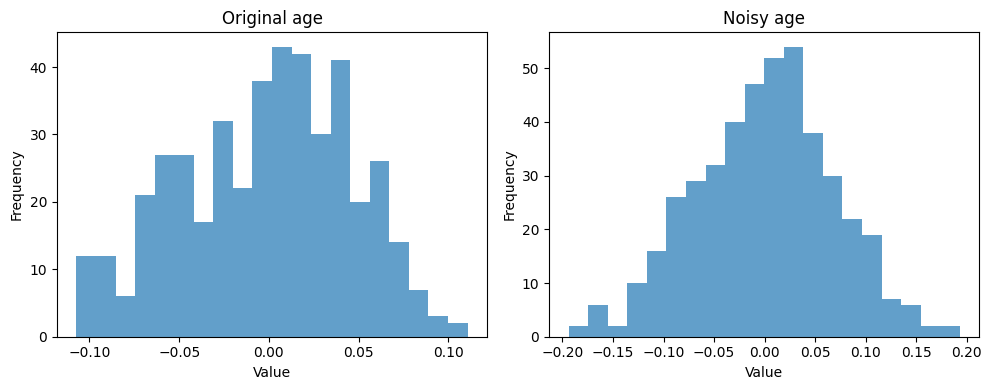

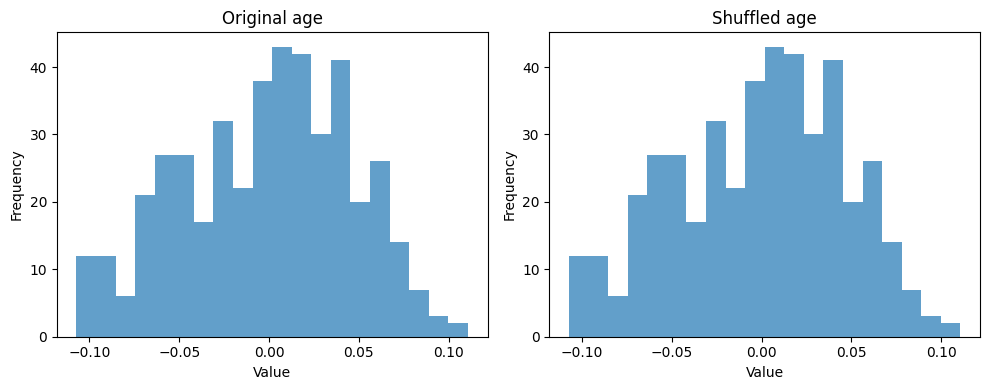

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load diabetes dataset as an example of tabular data
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

# Create a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("Original dataset shape:", df.shape)
print("Sample data:")
print(df.head())

# 1. Simple Noise Injection
def add_gaussian_noise(data, noise_level=0.05):
    """Add Gaussian noise to features"""
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

X_noisy = add_gaussian_noise(X)
df_noisy = pd.DataFrame(X_noisy, columns=feature_names)
df_noisy['target'] = y

print("\nAfter noise injection:")
print(df_noisy.head())

# 2. Feature shuffling (permutation)
def feature_shuffle(data, shuffle_fraction=0.1):
    """Shuffle values within a fraction of randomly selected features"""
    data_shuffled = data.copy()
    n_features = data.shape[1]
    n_to_shuffle = max(1, int(shuffle_fraction * n_features))

    # Select random features to shuffle
    features_to_shuffle = np.random.choice(
        np.arange(n_features), size=n_to_shuffle, replace=False
    )

    for feature_idx in features_to_shuffle:
        np.random.shuffle(data_shuffled[:, feature_idx])

    return data_shuffled

X_shuffled = feature_shuffle(X)
df_shuffled = pd.DataFrame(X_shuffled, columns=feature_names)
df_shuffled['target'] = y

print("\nAfter feature shuffling:")
print(df_shuffled.head())

# 3. Synthetic sampling for imbalanced data (SMOTE)
# For demonstration, let's create an imbalanced classification problem
# by thresholding the regression target
y_class = (y > np.median(y)).astype(int)
print(f"\nClass distribution before SMOTE: {np.bincount(y_class)}")

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y_class)

print(f"Class distribution after SMOTE: {np.bincount(y_smote)}")
print(f"Original shape: {X.shape}, After SMOTE: {X_smote.shape}")

# 4. Visualize the effect of augmentation on feature distributions
def plot_feature_distributions(original_df, augmented_df, feature_name, aug_name):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.hist(original_df[feature_name], bins=20, alpha=0.7)
    plt.title(f"Original {feature_name}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    plt.hist(augmented_df[feature_name], bins=20, alpha=0.7)
    plt.title(f"{aug_name} {feature_name}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Visualize distributions for a selected feature
selected_feature = feature_names[0]  # First feature
plot_feature_distributions(df, df_noisy, selected_feature, "Noisy")
plot_feature_distributions(df, df_shuffled, selected_feature, "Shuffled")

## Speech Data Augmentation

Speech data augmentation is critical for improving the robustness of speech recognition and audio classification models. Common techniques include time stretching, pitch shifting, adding background noise, and spectral augmentations. We'll create a simple example using synthetic audio data.

Original Signal:


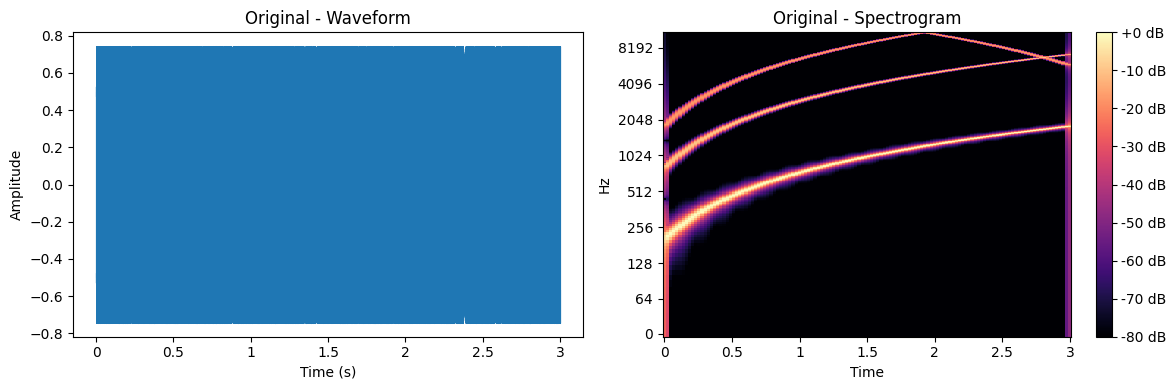


Time Stretched Signal:


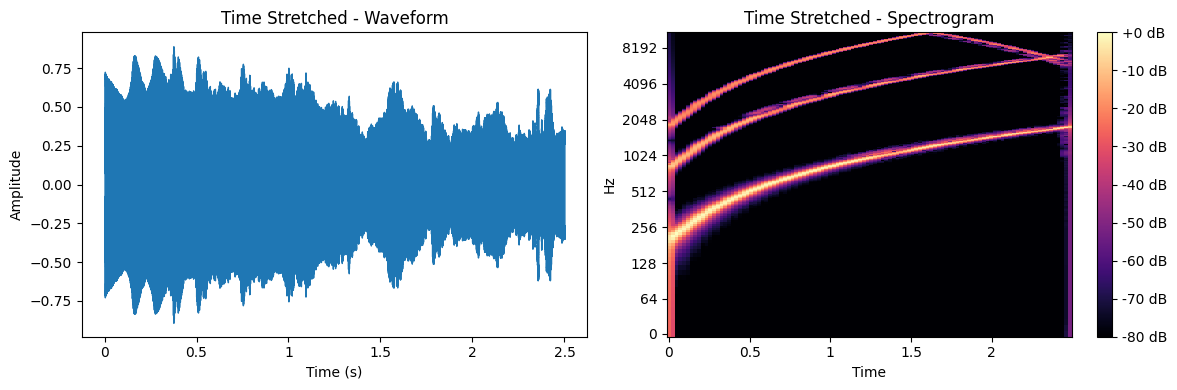


Pitch Shifted Signal:


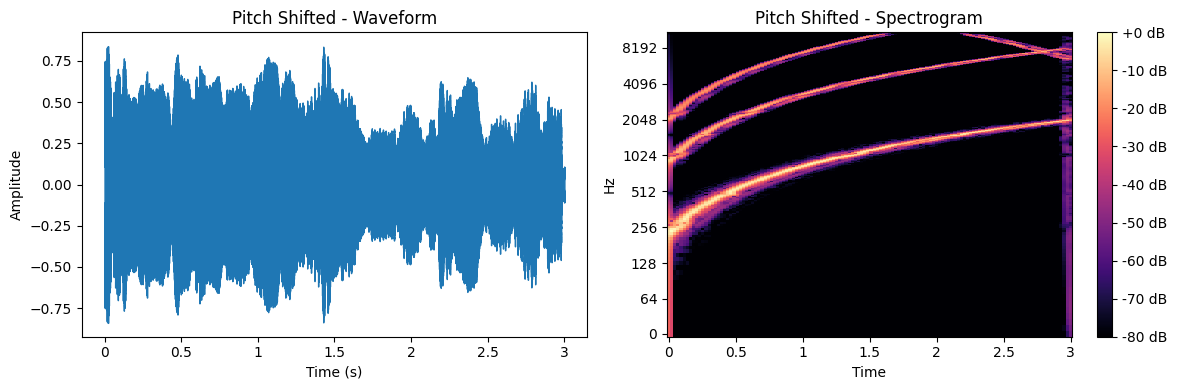


Noisy Signal:


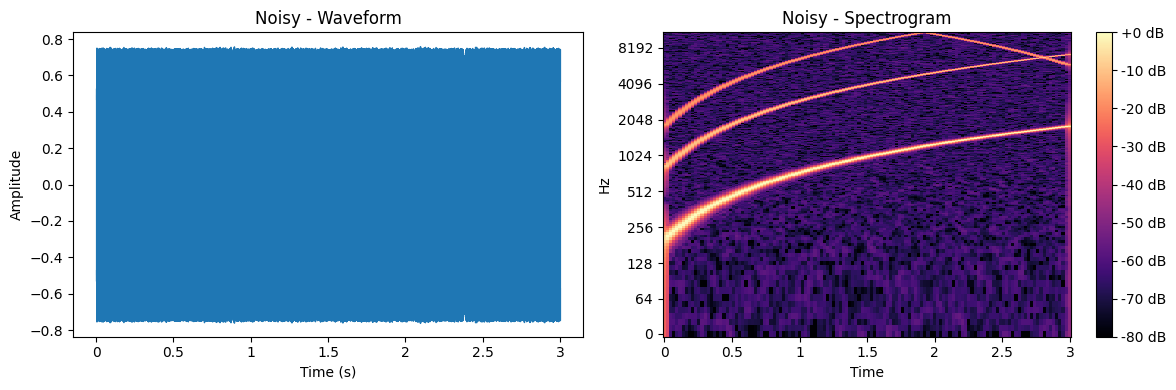


Phone Call Simulation:


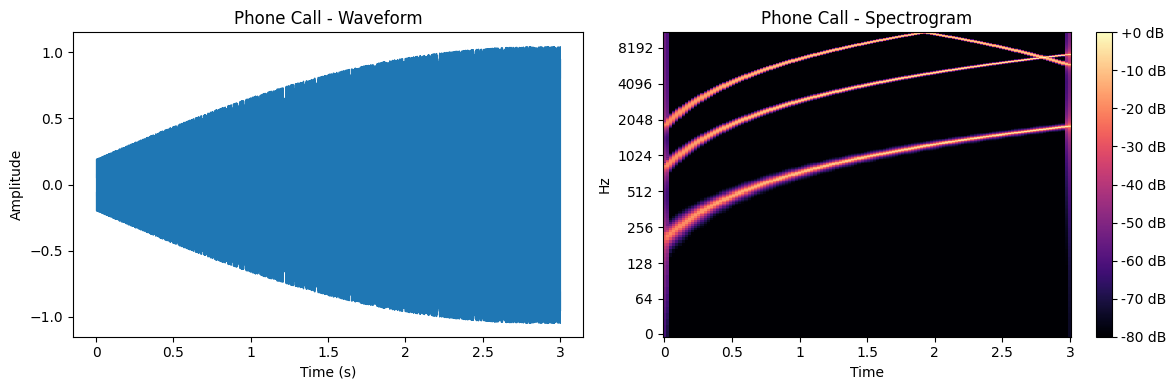

In [6]:
# Install required libraries
!pip install -q librosa soundfile matplotlib

import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio

# Generate a synthetic speech-like signal (simple chirp)
def generate_synthetic_speech(duration=3, sr=22050):
    """Generate a synthetic speech-like signal"""
    t = np.linspace(0, duration, int(sr * duration))
    # Create a chirp signal that sweeps from 200 Hz to 1000 Hz
    signal = 0.5 * np.sin(2 * np.pi * np.linspace(200, 1000, len(t)) * t)
    # Add some harmonics to make it more speech-like
    signal += 0.3 * np.sin(4 * np.pi * np.linspace(400, 2000, len(t)) * t)
    signal += 0.2 * np.sin(6 * np.pi * np.linspace(600, 3000, len(t)) * t)
    return signal, sr

# Speech augmentation techniques
def time_stretch(signal, rate=1.2):
    """Stretch or compress audio signal in time without changing pitch"""
    return librosa.effects.time_stretch(signal, rate=rate)

def pitch_shift(signal, sr, n_steps=2):
    """Shift the pitch of the audio signal"""
    return librosa.effects.pitch_shift(signal, sr=sr, n_steps=n_steps)

def add_noise(signal, noise_level=0.005):
    """Add white noise to the audio signal"""
    noise = np.random.normal(0, noise_level, len(signal))
    return signal + noise

def simulate_phone_call(signal, sr):
    """Simulate telephone quality by applying bandpass filter"""
    return librosa.effects.preemphasis(signal)

# Generate synthetic speech
original_signal, sr = generate_synthetic_speech()

# Apply augmentations
stretched_signal = time_stretch(original_signal)
pitch_shifted_signal = pitch_shift(original_signal, sr)
noisy_signal = add_noise(original_signal)
phone_signal = simulate_phone_call(original_signal, sr)

# Function to visualize audio waveform and spectrogram
def plot_audio(signal, sr, title):
    plt.figure(figsize=(12, 4))

    # Plot waveform
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(signal, sr=sr)
    plt.title(f"{title} - Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    # Plot spectrogram
    plt.subplot(1, 2, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"{title} - Spectrogram")

    plt.tight_layout()
    plt.show()

    # Return audio for playback
    return Audio(signal, rate=sr)

# Visualize and listen to original and augmented signals
print("Original Signal:")
audio_orig = plot_audio(original_signal, sr, "Original")
display(audio_orig)

print("\nTime Stretched Signal:")
audio_stretch = plot_audio(stretched_signal, sr, "Time Stretched")
display(audio_stretch)

print("\nPitch Shifted Signal:")
audio_pitch = plot_audio(pitch_shifted_signal, sr, "Pitch Shifted")
display(audio_pitch)

print("\nNoisy Signal:")
audio_noisy = plot_audio(noisy_signal, sr, "Noisy")
display(audio_noisy)

print("\nPhone Call Simulation:")
audio_phone = plot_audio(phone_signal, sr, "Phone Call")
display(audio_phone)

## Document Image Augmentation

Document image augmentation is essential for OCR (Optical Character Recognition) and document analysis tasks. These techniques help models become robust to variations in scanning quality, lighting, paper quality, and document orientation. We'll demonstrate basic document image augmentations.

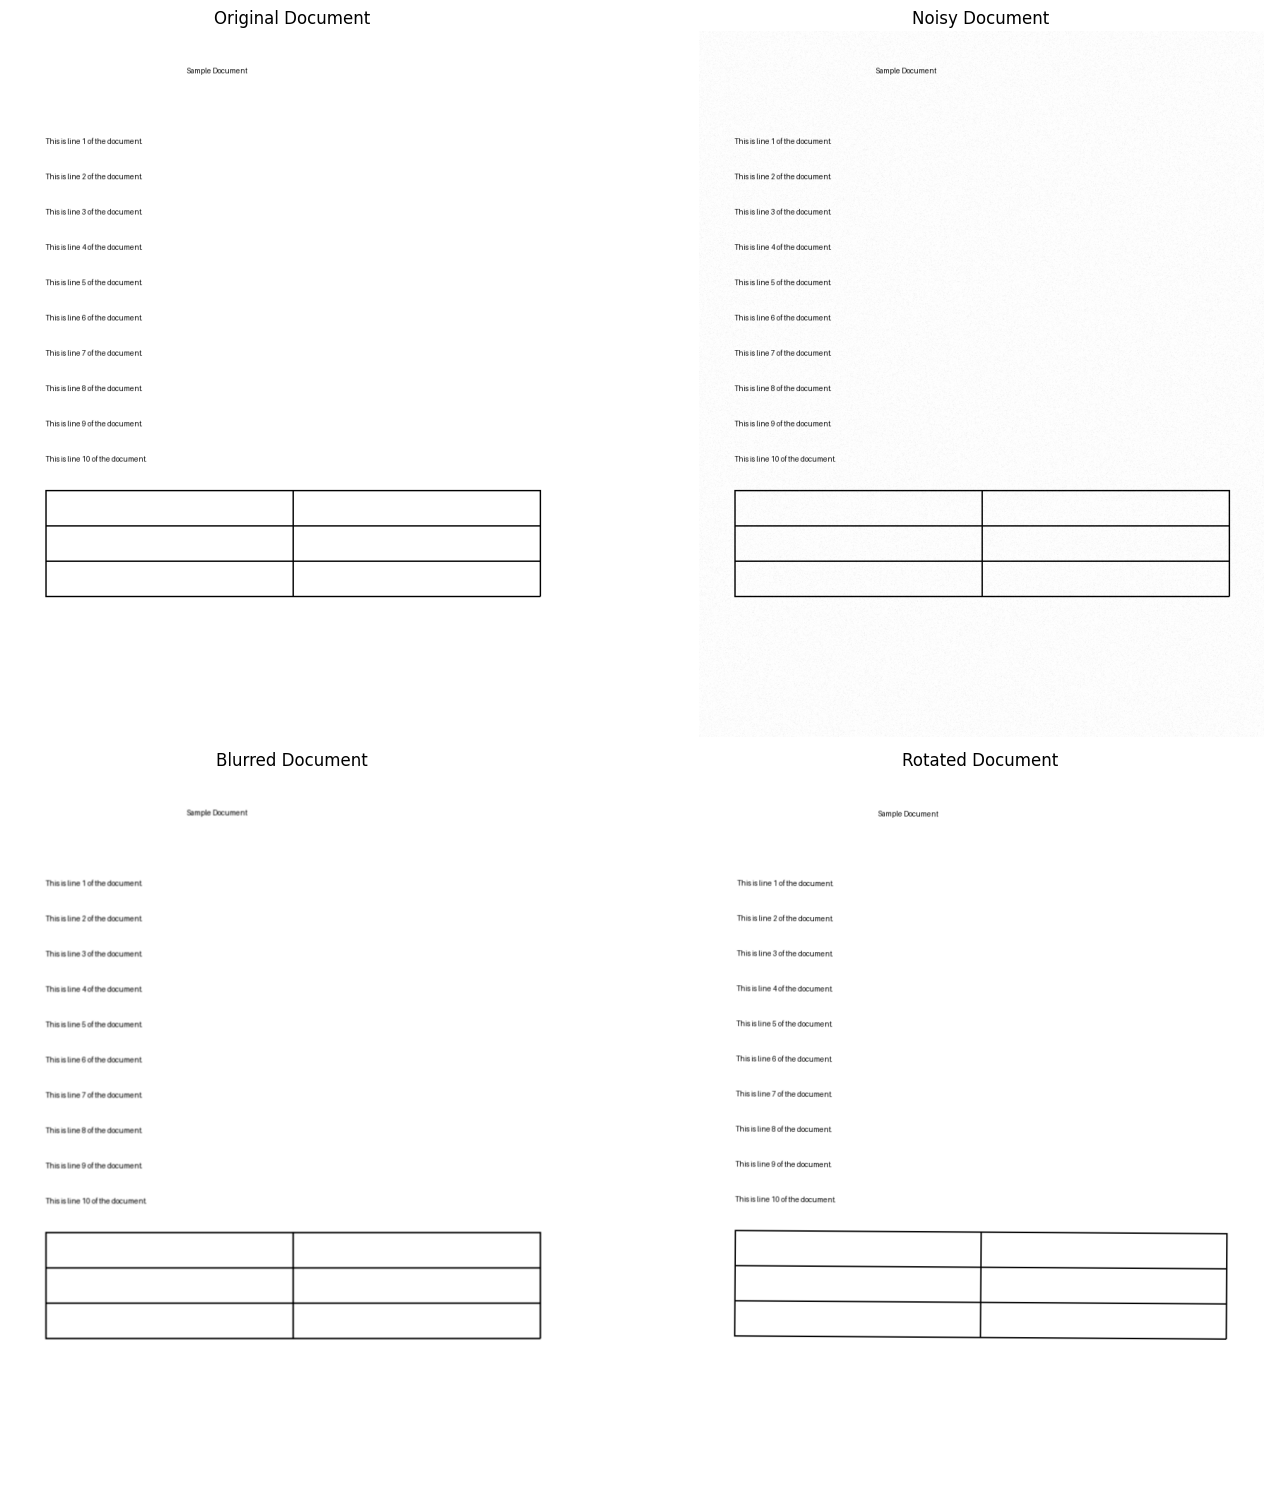

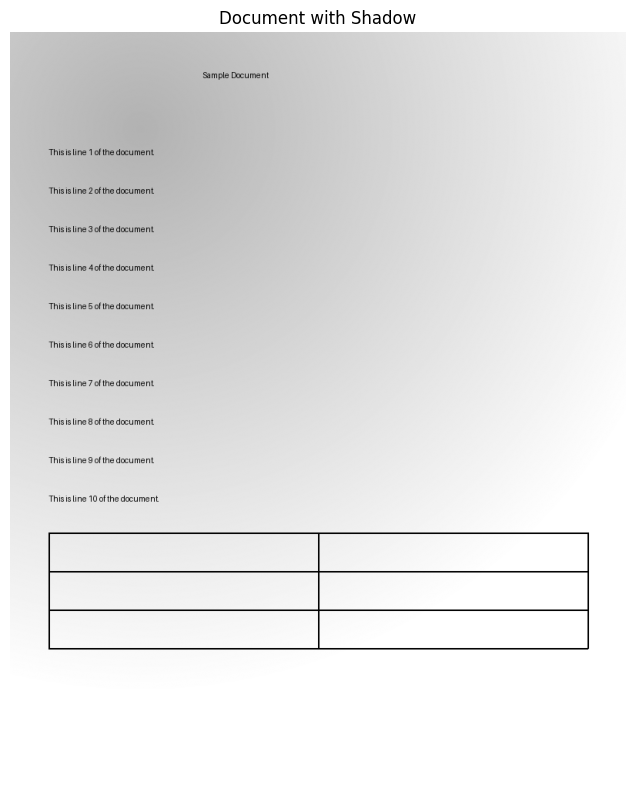

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import transform
from PIL import Image, ImageDraw, ImageFont

# Create a synthetic document image
def create_document_image(size=(800, 1000), text="Sample Document"):
    """Create a synthetic document image with text"""
    # Create a white background
    img = np.ones((size[1], size[0])) * 255

    # Convert to PIL Image for text rendering
    pil_img = Image.fromarray(img.astype(np.uint8))
    draw = ImageDraw.Draw(pil_img)

    # Add a title
    try:
        font = ImageFont.truetype("Arial", 36)
    except IOError:
        # Use default font if Arial is not available
        font = ImageFont.load_default()

    draw.text((size[0]//2 - 150, 50), text, fill=0, font=font)

    # Add some lines of text
    for i in range(10):
        y_pos = 150 + i * 50
        draw.text((50, y_pos), f"This is line {i+1} of the document.", fill=0, font=font)

    # Add a simple table
    table_top = 650
    for i in range(4):
        y_pos = table_top + i * 50
        draw.line([(50, y_pos), (750, y_pos)], fill=0, width=2)

    for i in range(3):
        x_pos = 50 + i * 350
        draw.line([(x_pos, table_top), (x_pos, table_top + 150)], fill=0, width=2)

    # Convert back to numpy array
    return np.array(pil_img)

# Document image augmentation techniques
def add_noise_to_document(img, noise_level=0.02):
    """Add random noise to document image"""
    noise = np.random.normal(0, noise_level, img.shape)
    noisy_img = img + noise * 255
    return np.clip(noisy_img, 0, 255).astype(np.uint8)

def blur_document(img, kernel_size=3):
    """Apply Gaussian blur to document image"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def random_rotation(img, max_angle=5):
    """Apply small random rotation to document image"""
    angle = np.random.uniform(-max_angle, max_angle)
    return transform.rotate(img, angle, resize=True, mode='constant', cval=1) * 255

def simulate_shadow(img, shadow_intensity=0.3):
    """Simulate shadow on part of the document"""
    shadow_img = img.copy().astype(float)

    # Create a random shadow polygon
    h, w = img.shape
    x1, y1 = np.random.randint(0, w//3), np.random.randint(0, h//3)
    x2, y2 = np.random.randint(2*w//3, w), np.random.randint(2*h//3, h)

    # Create gradient shadow
    xx, yy = np.meshgrid(np.arange(w), np.arange(h))
    dist = np.sqrt((xx - x1)**2 + (yy - y1)**2) / np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    dist = np.clip(dist, 0, 1)

    # Apply shadow with gradient
    shadow_factor = 1.0 - shadow_intensity * (1.0 - dist)
    shadow_img = shadow_img * shadow_factor[:, :, np.newaxis] if len(shadow_img.shape) == 3 else shadow_img * shadow_factor

    return np.clip(shadow_img, 0, 255).astype(np.uint8)

# Create original document image
original_doc = create_document_image()

# Apply augmentations
noisy_doc = add_noise_to_document(original_doc)
blurred_doc = blur_document(original_doc)
rotated_doc = random_rotation(original_doc).astype(np.uint8)
shadowed_doc = simulate_shadow(original_doc)

# Visualize original and augmented document images
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.imshow(original_doc, cmap='gray')
plt.title("Original Document")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(noisy_doc, cmap='gray')
plt.title("Noisy Document")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(blurred_doc, cmap='gray')
plt.title("Blurred Document")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(rotated_doc, cmap='gray')
plt.title("Rotated Document")
plt.axis('off')

plt.tight_layout()
plt.show()

# Show shadowed document separately
plt.figure(figsize=(8, 10))
plt.imshow(shadowed_doc, cmap='gray')
plt.title("Document with Shadow")
plt.axis('off')
plt.show()